In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_excel('/content/drive/My Drive/Patient Non-Adherence/2_DataSet/Input.xlsx')
df.head()

,PATIENT ID,AGE,MARITAL STATUS,FINANCIAL STATUS,MEDICLAIM,NUMBER OF MEDICATIONS,ALCOHOL ADICTION,SMOKING,BLOOD PRESSURE,MOOD,ENERGY LEVELS,HEADACHE,CONCENTRATION,DRUG COST,FOLLOWUP CHECKUPS,PRESCRIBTION START DATE,PRESCRIBTION END DATE,REFILL FREQUENCY(MEDICINE1),REFILL FREQUENCY(MEDICINE2),PRESCRIBED MEDICATION PERIOD(MONTHS),REFILLS DONE(MEDICINE 1),REFILLS DONE(MEDICINE 2),SEVIERITY OF ILLNESS(CHECKUP 1),SEVIERITY OF ILLNESS(CHECKUP 2),SEVIERITY OF ILLNESS(CHECKUP 3),SEVIERITY OF ILLNESS(CHECKUP 4),SEVIERITY OF ILLNESS(CHECKUP 5),FREQUENCY,CHRONIC ILLNESS,DIARRHEA,CONSTIPATION,NAUSEA,VOMITING,SORE THROAT,ALLERGIES,COLD,COUGH,FEVER,STOMACH ACHE,DROWSINESS,MEDICINE 1,MEDICINE 2,LABEL
0,PAT001,65,Unmarried,Poor,Yes,1,Yes,Once a week,120,Excited,High,No,High,High,1,2020-01-05,2020-01-10,Fortnightly,Fortnightly,5,6,5,0,0,0,0,0,3,No,Yes,No,No,No,Yes,No,Yes,No,Low,No,Yes,Clopidogrel,Filgrastim,1
1,PAT002,62,Unmarried,Poor,No,2,Ocassionally,Once a week,120,Sad,High,No,High,High,1,2020-01-06,2020-01-07,Monthly,Fortnightly,1,10,8,0,0,0,0,0,3,No,Yes,No,Yes,No,Yes,No,Yes,No,High,No,Yes,Atorvastatin,Diazepam,1
2,PAT003,62,Married,Poor,Yes,10,Ocassionally,Yes,140,Excited,High,No,High,High,1,2020-01-06,2020-01-11,Fortnightly,Monthly,5,8,10,0,0,0,0,0,3,Yes,Yes,Yes,Yes,No,No,No,Yes,No,High,No,Yes,Clindamycin,EMLA cream,1
3,PAT004,58,Unmarried,Poor,No,6,Yes,Once a week,100,Sad,Low,No,High,Low,1,2020-01-03,2020-01-07,Weekly,Monthly,4,5,5,0,0,0,0,0,3,No,Yes,No,Yes,Yes,No,No,Yes,No,High,No,Yes,Cefixime,Dacarbazine,1
4,PAT005,72,Married,Poor,No,2,No,No,110,Excited,High,No,High,Low,1,2020-01-06,2020-01-10,Monthly,Monthly,4,7,5,0,0,0,0,0,2,No,Yes,No,No,Yes,Yes,No,Yes,No,High,No,Yes,Cetrizine,Ifosfamide,1


DATA PREPROCESSING

In [45]:
#Check for na or missing data
df.isna().sum()

PATIENT ID                              0
AGE                                     0
MARITAL STATUS                          0
FINANCIAL STATUS                        0
MEDICLAIM                               0
NUMBER OF MEDICATIONS                   0
ALCOHOL ADICTION                        0
SMOKING                                 0
BLOOD PRESSURE                          0
MOOD                                    0
ENERGY LEVELS                           0
HEADACHE                                0
CONCENTRATION                           0
DRUG COST                               0
FOLLOWUP CHECKUPS                       0
PRESCRIBTION START DATE                 0
PRESCRIBTION END DATE                   0
REFILL FREQUENCY(MEDICINE1)             0
REFILL FREQUENCY(MEDICINE2)             0
PRESCRIBED MEDICATION PERIOD(MONTHS)    0
REFILLS DONE(MEDICINE 1)                0
REFILLS DONE(MEDICINE 2)                0
SEVIERITY OF ILLNESS(CHECKUP 1)         0
SEVIERITY OF ILLNESS(CHECKUP 2)   

In [46]:
X = df.drop(['AGE', 'MARITAL STATUS', 'ALCOHOL ADICTION', 'SMOKING', 'BLOOD PRESSURE', 'MOOD', 'ENERGY LEVELS', 'HEADACHE', 'CONCENTRATION', 'PRESCRIBTION START DATE', 'PRESCRIBTION END DATE', 'CHRONIC ILLNESS', 'DIARRHEA', 'CONSTIPATION', 'NAUSEA', 'VOMITING', 'SORE THROAT', 'ALLERGIES', 'COLD', 'COUGH', 'FEVER', 'STOMACH ACHE', 'DROWSINESS', 'FREQUENCY', 'FINANCIAL STATUS', 'MEDICLAIM', 'NUMBER OF MEDICATIONS', 'DRUG COST'], axis = 1)
X

,PATIENT ID,FOLLOWUP CHECKUPS,REFILL FREQUENCY(MEDICINE1),REFILL FREQUENCY(MEDICINE2),PRESCRIBED MEDICATION PERIOD(MONTHS),REFILLS DONE(MEDICINE 1),REFILLS DONE(MEDICINE 2),SEVIERITY OF ILLNESS(CHECKUP 1),SEVIERITY OF ILLNESS(CHECKUP 2),SEVIERITY OF ILLNESS(CHECKUP 3),SEVIERITY OF ILLNESS(CHECKUP 4),SEVIERITY OF ILLNESS(CHECKUP 5),MEDICINE 1,MEDICINE 2,LABEL
0,PAT001,1,Fortnightly,Fortnightly,5,6,5,0,0,0,0,0,Clopidogrel,Filgrastim,1
1,PAT002,1,Monthly,Fortnightly,1,10,8,0,0,0,0,0,Atorvastatin,Diazepam,1
2,PAT003,1,Fortnightly,Monthly,5,8,10,0,0,0,0,0,Clindamycin,EMLA cream,1
3,PAT004,1,Weekly,Monthly,4,5,5,0,0,0,0,0,Cefixime,Dacarbazine,1
4,PAT005,1,Monthly,Monthly,4,7,5,0,0,0,0,0,Cetrizine,Ifosfamide,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PAT996,5,Monthly,Monthly,9,8,4,1,2,1,3,2,Chlorambucil,Enoxaparin,1
996,PAT997,5,Fortnightly,Monthly,9,6,7,1,2,2,2,1,Carboplatin,Dacarbazine,1
997,PAT998,2,Weekly,Monthly,1,4,4,2,0,0,0,0,Chlorambucil,Hydroxychloroquine phosphate,0
998,PAT999,4,Weekly,Monthly,11,4,8,1,0,0,0,0,Cefixime,EMLA cream,1


In [47]:
#Convert all the non-numeric columns to numerical data types
from sklearn.preprocessing import LabelEncoder
for column in X.columns:
    if X[column].dtype == np.number:
        continue
    X[column] = LabelEncoder().fit_transform(X[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [48]:
#Scale the cleaned data
x = X.drop('LABEL', axis = 1)
y = X['LABEL']

#Standardizing/Scaling the features
X1 = StandardScaler().fit_transform(x)

# PREDICTING ADHERENT AND NON-ADHERENT PATIENTS USING RANDOM FOREST 

In [49]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
X_train = x_train.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)
X_test = x_test.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)

In [51]:
#Create the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#Train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
predictions = model.predict(X_test)

#printing the predictions
print(predictions)

[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1]


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score)

0.845


In [54]:
df1 = x_test[['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2']]

In [55]:
df1['Label'] = pd.Series(predictions, index=df1.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df1["Label"] = df1["Label"].replace({0: "Adherent", 1: "Non-Adherent"})
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PATIENT ID,MEDICINE 1,MEDICINE 2,Label
507,508,6,3,Non-Adherent
818,819,6,3,Non-Adherent
452,453,9,9,Adherent
368,369,9,1,Non-Adherent
242,243,5,3,Non-Adherent
...,...,...,...,...
430,431,5,8,Non-Adherent
874,875,3,4,Non-Adherent
550,551,5,9,Non-Adherent
608,609,6,4,Non-Adherent


In [57]:
df1.to_excel('/content/drive/My Drive/Patient Non-Adherence/2_DataSet/Output.xlsx')

FEATURE IMPORTANCE

In [58]:
from matplotlib import pyplot as plt
model.feature_importances_

array([0.09630032, 0.0866827 , 0.04335128, 0.26637736, 0.15455253,
       0.15158189, 0.1060284 , 0.02424734, 0.02617538, 0.02266651,
       0.02203629])

<BarContainer object of 11 artists>

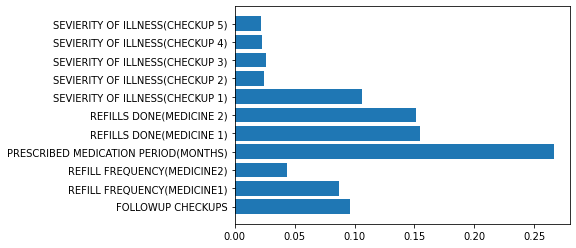

In [59]:
plt.barh(X_test.columns, model.feature_importances_)

KFOLD CROSS VALIDATION

In [60]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model, x, y, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.72 0.79 0.77 0.74 0.83 0.83 0.74 0.83 0.81 0.8 ]
0.786


PREDICTING ADHERENT AND NON-ADHERENT PATIENTS USING XGBOOST

In [61]:
import xgboost as xgb
x1 = x
y1 = y

In [62]:
#define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x1,label=y1)

In [63]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [64]:
X1_train = x1_train.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)
X1_test = x1_test.drop(['PATIENT ID', 'MEDICINE 1', 'MEDICINE 2'], axis=1)

In [65]:
from xgboost import XGBClassifier

#declare parameters
params = {'objective' : 'binary:logistic', 'max_depth' : 10, 'min_child_weight' : 5, 'subsample' : 0.3, 'learning_rate' : 0.05, 'gamma' : 2, 'reg_lambda' : 0}

#instantiate the classifier
xgb_clf = XGBClassifier(**params)

#fit the classifier to the training data
xgb_clf.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [66]:
y_pred = xgb_clf.predict(X1_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y1_test, y_pred)
print(accuracy_score)

0.84


In [68]:
from xgboost import cv
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10, num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)


In [69]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.773593,0.019033,0.745290,0.051050
1,0.812779,0.008118,0.775513,0.055766
2,0.828908,0.006541,0.791687,0.036791
3,0.839598,0.007416,0.803418,0.038076
4,0.845170,0.008203,0.810933,0.030428


The accuracy for RandomForestClassifier is 78% and The accuracy for XGBoost is 84%

PRECISION-RECALL

In [70]:
#Check precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        49
           1       0.86      0.94      0.90       151

    accuracy                           0.84       200
   macro avg       0.80      0.74      0.76       200
weighted avg       0.83      0.84      0.83       200



POSITIVE AND NEGATIVE CORRELATION

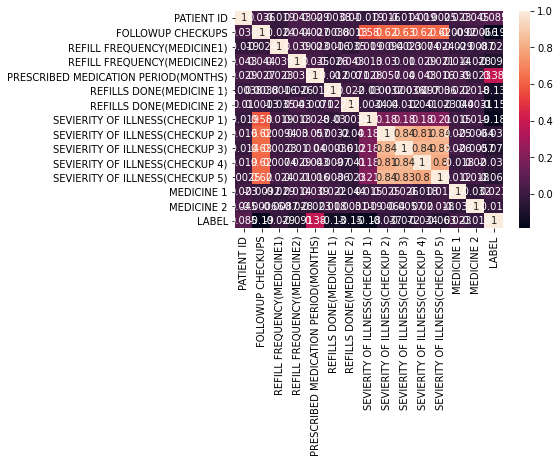

In [71]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

If the correlation value is 0.9 or 1, it is called as strongly positive correlation and if the correlation value is -1 it is called as strongly negative correlation.

FORECASTING THE DRUG MANUFACTURING

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df1 = pd.read_excel('/content/drive/My Drive/Patient Non-Adherence/Forecasting/For_Input.xlsx')
df1.head()

,MONTH,QUANTITY,QUANTITY SOLD,DRUG,SALES,LOCATION
0,1,900,700,Abilify,21000,San Francisco
1,2,900,600,Abilify,18600,San Francisco
2,3,900,600,Abilify,19200,San Francisco
3,4,900,800,Abilify,26400,San Francisco
4,5,900,850,Abilify,28900,San Francisco


In [107]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [121]:
#data = df1.drop(['MONTH'], axis=1)

In [130]:
#Convert all the non-numeric columns to numerical data types
for column in df1.columns:
    if df1[column].dtype == np.number:
        continue
    df1[column] = LabelEncoder().fit_transform(df1[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
cols = df1.columns

In [140]:
df1.dtypes

MONTH            int64
QUANTITY         int64
QUANTITY SOLD    int64
DRUG             int64
SALES            int64
LOCATION         int64
dtype: object

CHECKING STATIONARITY

In [142]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(df1,-1,1).eig

array([0.40759419, 0.19505104, 0.1640378 , 0.10334012, 0.0870044 ,
       0.02888426])

CREATING THE TRAIN AND VALIDATION SET

In [144]:
train = df1[:int(0.8*(len(df1)))]
valid = df1[int(0.8*(len(df1))):]

FIT THE MODEL

In [145]:
model = VAR(endog=train)
model_fit = model.fit()

MAKE PREDICTION ON VALIDATION

In [146]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


AS PREDICTIONS WILL BE IN ARRAY FORM, WE CONVERT IT INTO DATAFRAME

In [147]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,6):
  for i in range(0,len(prediction)):
    pred.iloc[i][j] = prediction[i][j]

CHECK RMSE

In [152]:
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in cols:
  print('rmse value for' , i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

TypeError: ignored